# Choose distinct k items from n items, each item i occur with probabilities p_i

In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def n_choose_k(p,m):
    '''
        Implement the n choose k with probability p algorithm
            1. sort according to p in descending order
            2. sequentially select item i with probability p_i(k-\sum_{j<i} y_j)/(k - \sum_{j<i} p_j),
                where y_j = 1 indicates the j-th item has been selected
        Input:
            Probabilities array p with size n such that sum_i p_i = k
            m: Generate final selection set m times for simulation purposes
    '''
    
    n = len(p)
    k = int(np.sum(p))
    
    random_numbers = np.random.uniform(size=(m,n))
    items = np.argsort(p)[::-1]  # sort prob in descending order
    
    res = []
    for t in range(m):
        num_selected = 0
        prob = 0
        selection = []

        for i in range(n):
            if num_selected < k:
                p_new = np.minimum(1,p[items[i]]*(k-num_selected)*1.0/(k-prob))

                # select items[i] with probability p_new 
                flag = random_numbers[t][i]<=p_new
                num_selected += flag
                prob += p[items[i]]
                if flag==1:
                    selection.append(items[i])
            else:
                break
        assert len(selection)<=k, 'Error: selected more than k items'
        assert len(selection)>=k, 'Error: selected less than k items'
        
        res.append(selection)
    return res

In [6]:
prob = np.array([0.3,0.1,0.6,0.3,0.1,0.6,0.9,0.8,0.3])
m = 100000

In [7]:
prob = np.array([0.8,0.8,0.75,0.72,0.7,0.65,0.65,0.62,0.61,0.6,0.45,0.3,0.38,0.2,0.1,0.1,0.15,0.05,0.06,0.08,0.05,0.02,0.04,0.12])
m = 100000

In [8]:
sum(prob)

9.0

In [121]:
prob = np.array([0.8,0.7,0.5])
m = 100000

In [10]:

selections = n_choose_k(prob,m)

n = len(prob)
k = int(np.sum(prob))
freq = {}

for i in range(n):
    freq[i] = 0

for s in selections:
    for i in range(k):
        freq[s[i]] += 1
        
for i in range(n):
    freq[i] = freq[i]*1.0/m
    
print(freq)

{0: 0.80013, 1: 0.8002, 2: 0.74928, 3: 0.71793, 4: 0.70075, 5: 0.65004, 6: 0.65133, 7: 0.6215, 8: 0.61132, 9: 0.60023, 10: 0.44926, 11: 0.30056, 12: 0.38323, 13: 0.19739, 14: 0.09941, 15: 0.09864, 16: 0.14968, 17: 0.04978, 18: 0.06002, 19: 0.07925, 20: 0.05048, 21: 0.02079, 22: 0.04046, 23: 0.11834}


In [17]:
d={}
for i in range(len(prob)):
    d[i] = prob[i]

Text(0, 0.5, 'probabilities')

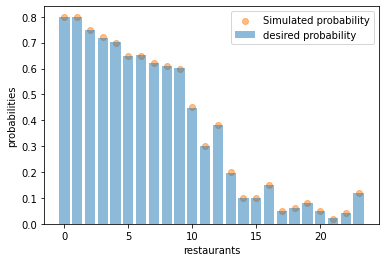

In [32]:
x = freq.keys()
y = freq.values()
ax = plt.bar(x,y,alpha=0.5)
x = d.keys()
y = d.values()
plt.scatter(x,y,alpha=0.5)
plt.legend(['Simulated probability','desired probability'])
plt.xlabel('restaurants')
plt.ylabel('probabilities')